In [3]:
%pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
  Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----------------------------------

In [4]:
%pip install mlxtend


  Using cached mlxtend-0.23.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached mlxtend-0.23.1-py3-none-any.whl (1.4 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
diabetes_df = pd.read_csv(r".\diabetes_prediction_dataset.csv") 
diabetes_df.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
diabetes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [4]:
diabetes_df['gender'] = diabetes_df['gender'].map({
    'Male': 1,
    'Female': 2,
})

diabetes_df['smoking_history'] = diabetes_df['smoking_history'].map({
    'never': 0,
    'No Info': 1,
    'current': 2,
    'former': 3,
    'ever': 4,
    'not current': 5
})

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               99982 non-null   float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 6.9 MB


In [6]:
diabetes_df['gender'] = diabetes_df['gender'].values.astype('int64')

In [7]:
diabetes_df['age'] = diabetes_df['age'].values.astype('int64')

In [8]:
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2,80,0,1,0,25.19,6.6,140,0
1,2,54,0,0,1,27.32,6.6,80,0
2,1,28,0,0,0,27.32,5.7,158,0
3,2,36,0,0,2,23.45,5.0,155,0
4,1,76,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,2,80,0,0,1,27.32,6.2,90,0
99996,2,2,0,0,1,17.37,6.5,100,0
99997,1,66,0,0,3,27.83,5.7,155,0
99998,2,24,0,0,0,35.42,4.0,100,0


In [9]:
diabetes_df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-1.660207e+15,41.875660,0.07485,0.039420,1.306950,27.320767,5.527507,138.058060,0.085000
std,1.237340e+17,22.535417,0.26315,0.194593,1.454501,6.636783,1.070672,40.708136,0.278883
min,-9.223372e+18,0.000000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,1.000000e+00,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2.000000e+00,43.000000,0.00000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,2.000000e+00,60.000000,0.00000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000e+00,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,100000.0,-1.660207e+15,1.237340e+17,-9.223372e+18,1.00,2.00,2.00,2.00
age,100000.0,4.187566e+01,2.253542e+01,0.000000e+00,24.00,43.00,60.00,80.00
hypertension,100000.0,7.485000e-02,2.631505e-01,0.000000e+00,0.00,0.00,0.00,1.00
heart_disease,100000.0,3.942000e-02,1.945930e-01,0.000000e+00,0.00,0.00,0.00,1.00
smoking_history,100000.0,1.306950e+00,1.454501e+00,0.000000e+00,0.00,1.00,2.00,5.00
bmi,100000.0,2.732077e+01,6.636783e+00,1.001000e+01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507e+00,1.070672e+00,3.500000e+00,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,1.380581e+02,4.070814e+01,8.000000e+01,100.00,140.00,159.00,300.00
diabetes,100000.0,8.500000e-02,2.788831e-01,0.000000e+00,0.00,0.00,0.00,1.00


In [12]:
#### Missing values
diabetes_df.isnull().head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [13]:
diabetes_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

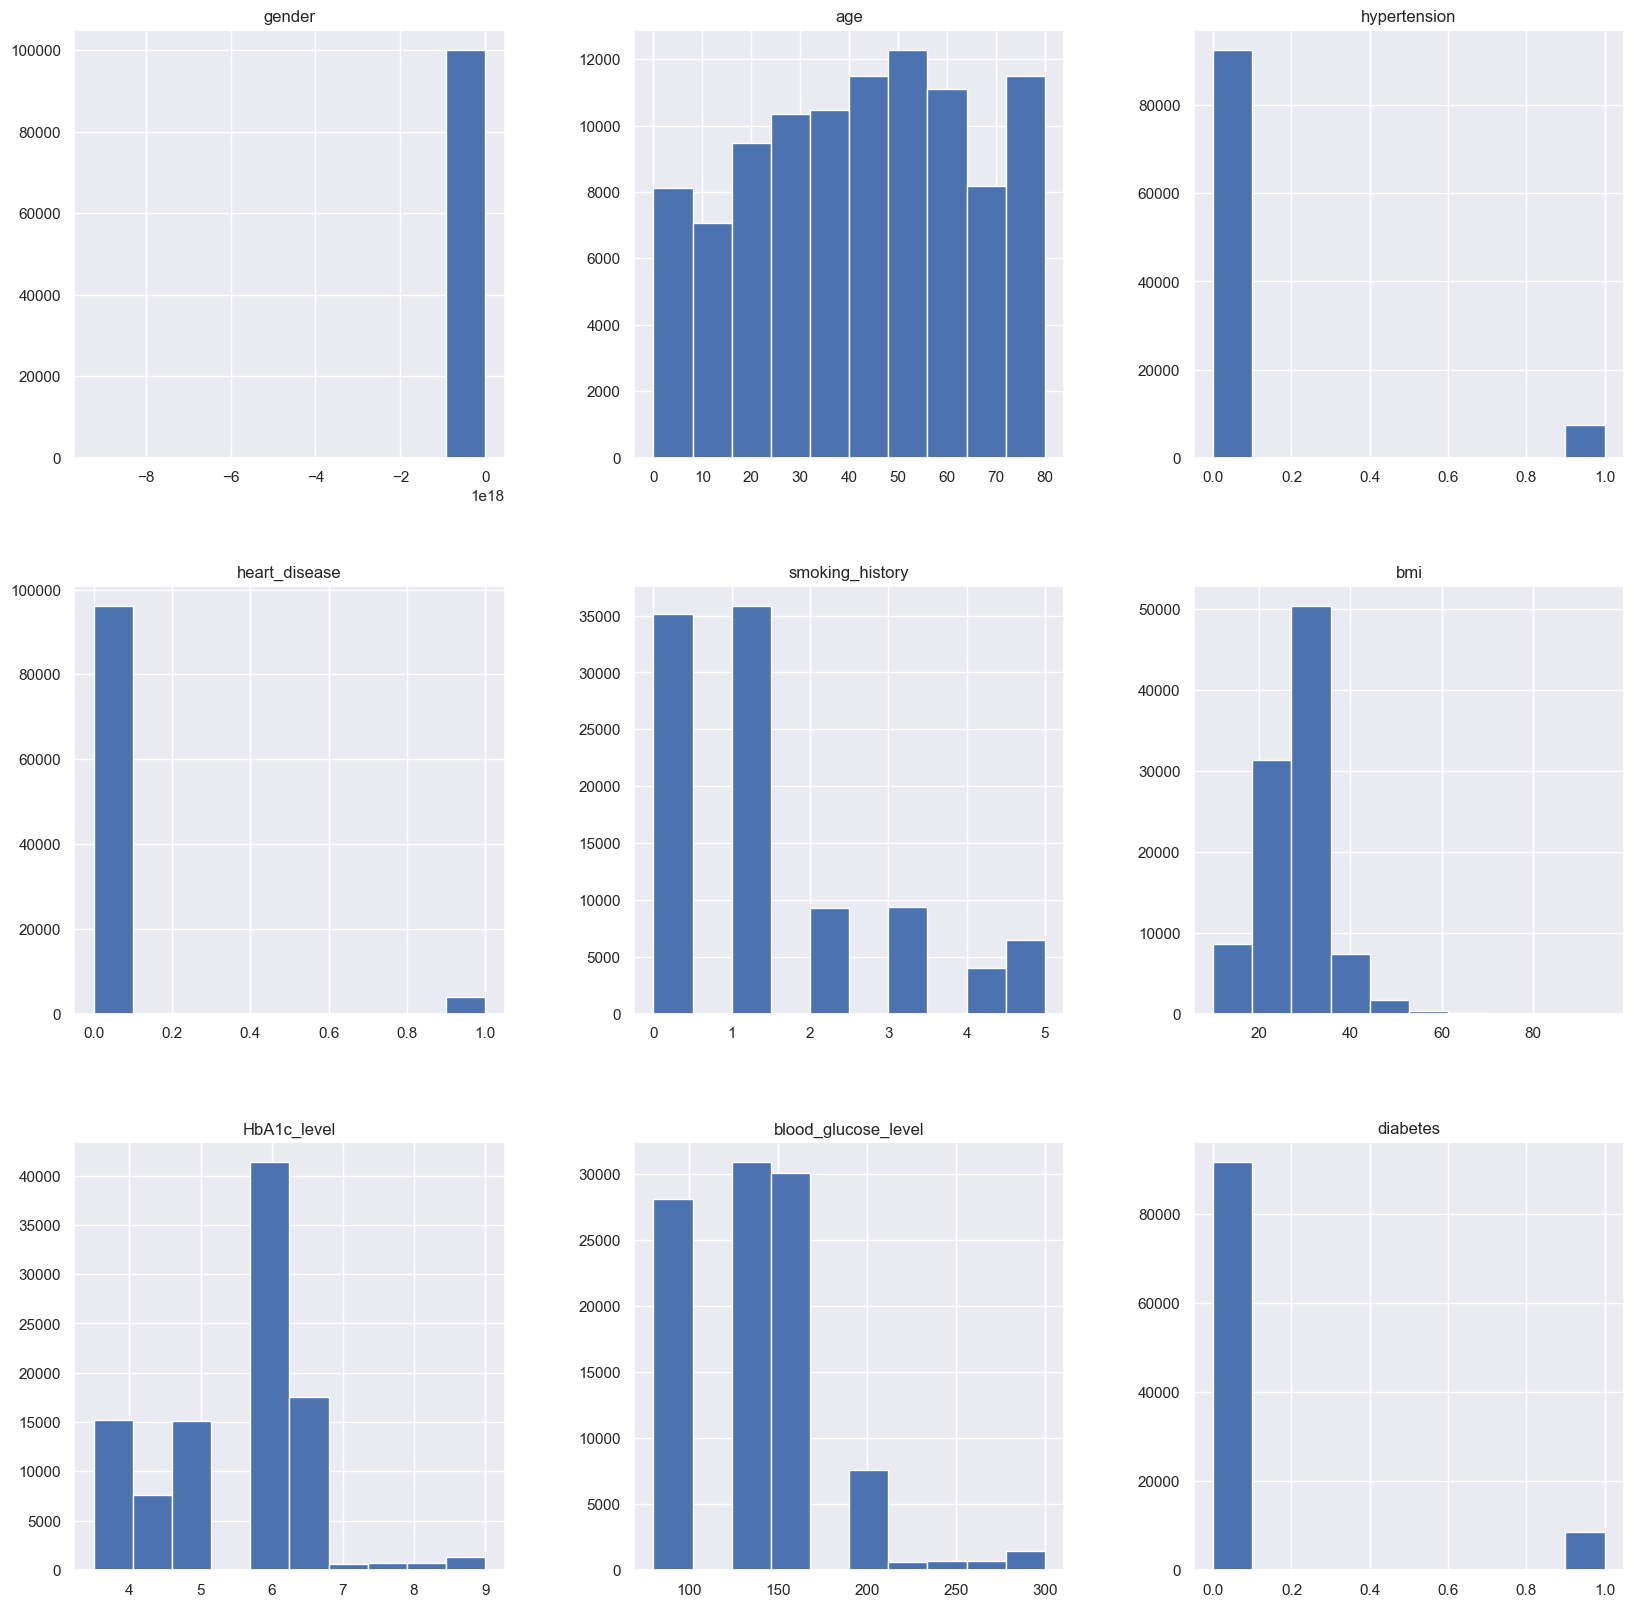

In [13]:

p = diabetes_df.hist(figsize=(20, 20))

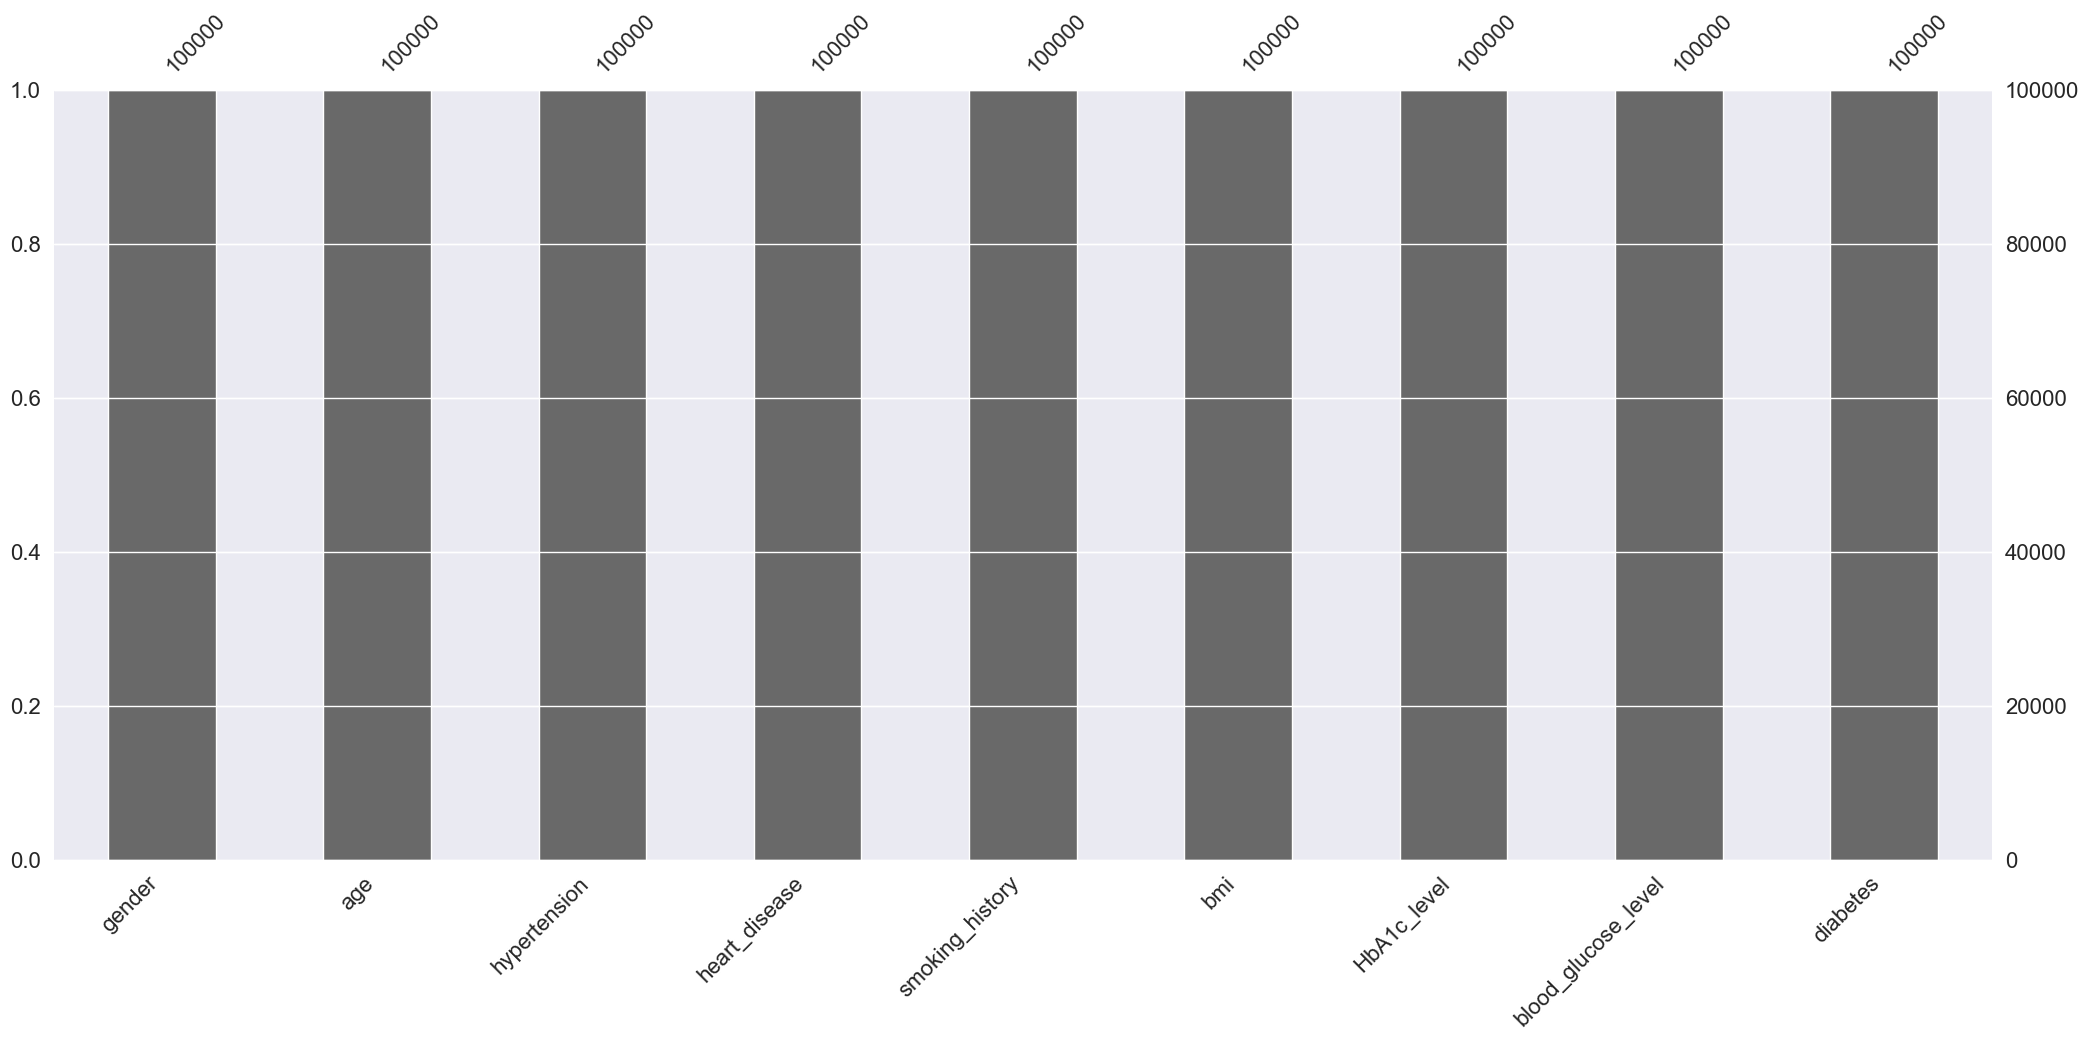

In [14]:
p = msno.bar(diabetes_df)

diabetes
0    91500
1     8500
Name: count, dtype: int64


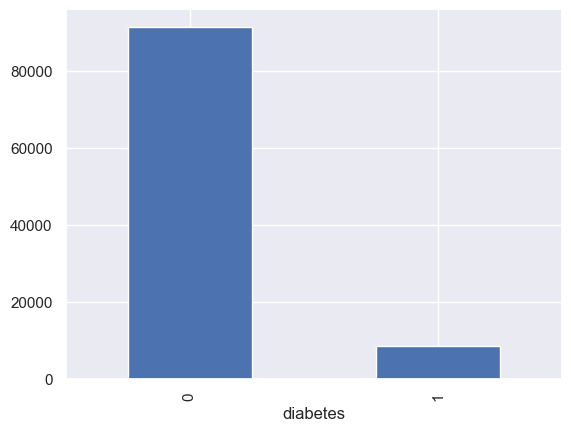

In [14]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["diabetes"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.diabetes.value_counts())
p = diabetes_df.diabetes.value_counts().plot(kind="bar")

#### Ensuring proper distribution of the dataset diabetes distribution

In [15]:
diabetes_df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [16]:
diabetes_0 = diabetes_df[diabetes_df['diabetes'] == 0]
diabetes_1 = diabetes_df[diabetes_df['diabetes'] == 1]

In [17]:
# Resampling the data
from sklearn.utils import resample

diabetes_0_res = resample(diabetes_0, n_samples=100000,
                          random_state=123, replace=True)
diabetes_1_res = resample(diabetes_1, n_samples=100000,
                          random_state=123, replace=True)

In [18]:
diabetes_df = pd.concat([diabetes_0_res, diabetes_1_res])
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
17200,1,31,0,0,1,24.66,4.8,158,0
30695,2,63,0,0,0,30.67,5.8,160,0
19408,2,62,0,0,1,30.40,3.5,159,0
67205,2,64,1,0,1,31.55,5.0,159,0
69158,1,42,0,0,0,30.14,6.5,158,0
...,...,...,...,...,...,...,...,...,...
37158,2,39,0,0,2,34.28,9.0,240,1
3002,1,38,0,0,1,35.70,8.2,155,1
41397,1,14,0,0,0,32.81,6.6,300,1
1218,1,65,1,0,3,22.06,9.0,300,1


In [19]:
# Library

import matplotlib.pyplot as plt

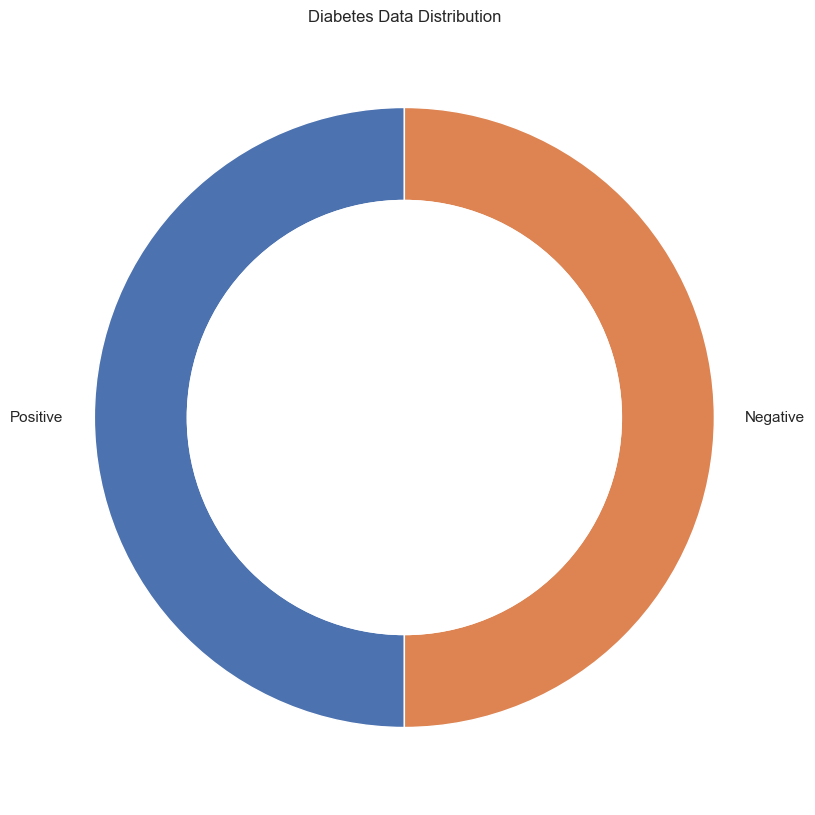

In [20]:
# Viewing the data distribution of the dataset
plt.figure(figsize=(10,16))
circle = plt.Circle((0,0), 0.7, color='white')
plt.title('Diabetes Data Distribution')
plt.pie(
    diabetes_df['diabetes'].value_counts(),
    labels=['Positive', 'Negative'],
    startangle=90,
    wedgeprops=dict(width=0.3)
)
plot = plt.gcf()
plot.gca().add_artist(circle)

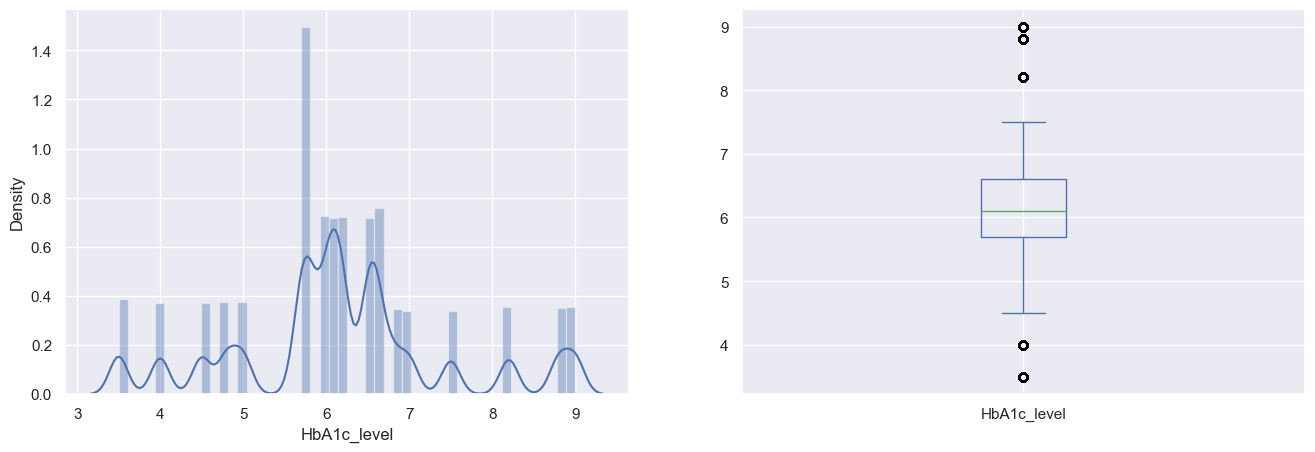

In [ ]:
plt.subplot(121)
sns.distplot(diabetes_df['HbA1c_level'])
plt.subplot(122)
diabetes_df['HbA1c_level'].plot.box(figsize=(16, 5))
plt.show()

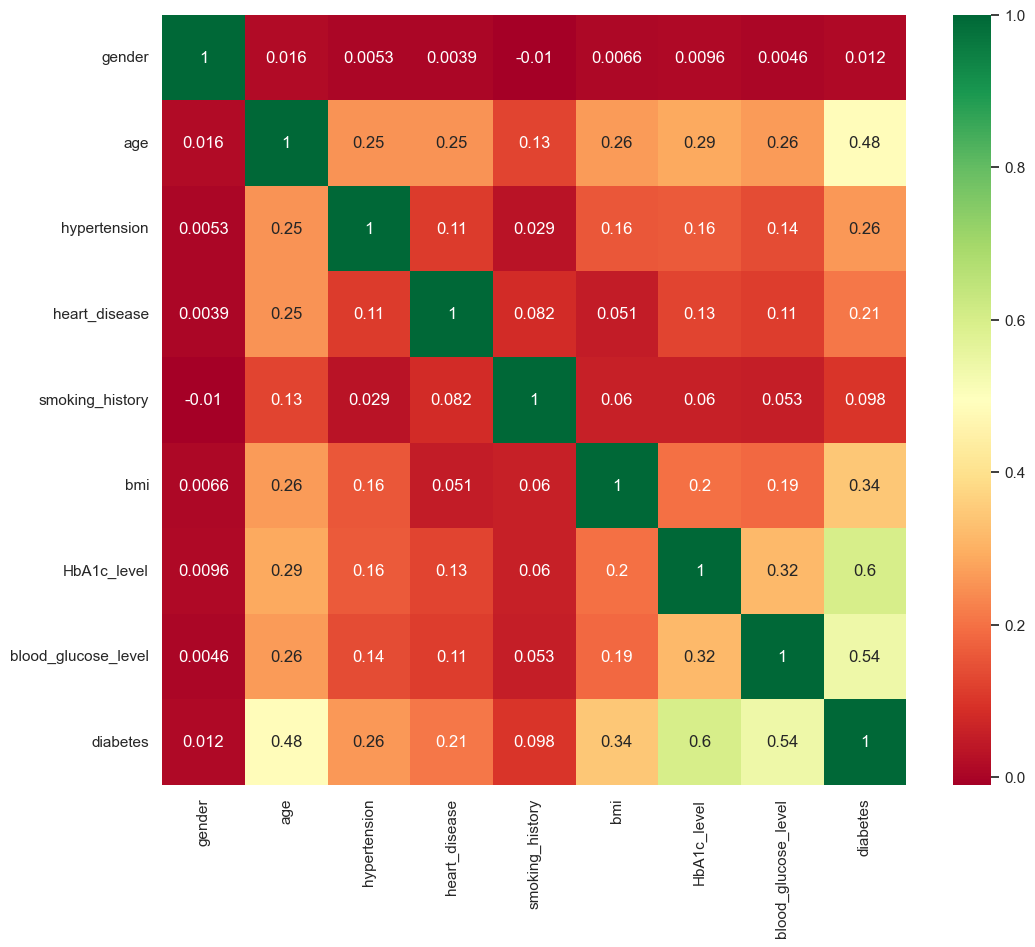

In [21]:
plt.figure(figsize=(12, 10))
# Using seaborn to create a heatmap for the correlation matrix
p = sns.heatmap(diabetes_df.corr(), annot=True, cmap='RdYlGn')

In [22]:
diabetes_df_copy = diabetes_df.copy(deep=True)

In [23]:
from sklearn.preprocessing import StandardScaler

#### Normalizing the dataset between 1.0 and 0
sc_X = StandardScaler()

diabetes_df = pd.DataFrame(sc_X.fit_transform(diabetes_df), 
                       columns=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'])

diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.012451,-0.908272,-0.425039,-0.312388,-0.276132,-0.642655,-1.064616,-0.098674,-1.0
1,0.012451,0.579941,-0.425039,-0.312388,-0.921480,0.164062,-0.284770,-0.063611,-1.0
2,0.012451,0.533434,-0.425039,-0.312388,-0.276132,0.127820,-2.078415,-0.081143,-1.0
3,0.012451,0.626447,2.352723,-0.312388,-0.276132,0.282184,-0.908647,-0.081143,-1.0
4,0.012451,-0.396699,-0.425039,-0.312388,-0.921480,0.092921,0.261121,-0.098674,-1.0


In [24]:
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.012451,-0.908272,-0.425039,-0.312388,-0.276132,-0.642655,-1.064616,-0.098674,-1.0
1,0.012451,0.579941,-0.425039,-0.312388,-0.921480,0.164062,-0.284770,-0.063611,-1.0
2,0.012451,0.533434,-0.425039,-0.312388,-0.276132,0.127820,-2.078415,-0.081143,-1.0
3,0.012451,0.626447,2.352723,-0.312388,-0.276132,0.282184,-0.908647,-0.081143,-1.0
4,0.012451,-0.396699,-0.425039,-0.312388,-0.921480,0.092921,0.261121,-0.098674,-1.0
...,...,...,...,...,...,...,...,...,...
199995,0.012451,-0.536219,-0.425039,-0.312388,0.369217,0.648630,2.210735,1.338943,1.0
199996,0.012451,-0.582726,-0.425039,-0.312388,-0.276132,0.839235,1.586859,-0.151270,1.0
199997,0.012451,-1.698885,-0.425039,-0.312388,-0.921480,0.451313,0.339106,2.390858,1.0
199998,0.012451,0.672954,2.352723,-0.312388,1.014565,-0.991651,2.210735,2.390858,1.0


In [25]:
X = diabetes_df.drop('diabetes', axis=1)
y = diabetes_df['diabetes']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

#### Training the RainForest Classifier Model

In [106]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [107]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics
print("Training Accuracy =", format(metrics.accuracy_score(y_train, rfc_train)))

Training Accuracy = 0.99845


In [108]:
predictions = rfc.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, predictions)))

Test Accuracy = 0.9927166666666667


In [109]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[29626   419]
 [   18 29937]]
              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99     30045
         1.0       0.99      1.00      0.99     29955

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



#### Training the Decision Tree Classifier Model

In [110]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [111]:
dtree_train = dtree.predict(X_train)
from sklearn import metrics
print("Training Accuracy =", format(metrics.accuracy_score(y_train, dtree_train)))

Training Accuracy = 0.99845


In [112]:
predictions_dtree = dtree.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, predictions_dtree)))

Test Accuracy = 0.9893666666666666


In [113]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[29626   419]
 [   18 29937]]
              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99     30045
         1.0       0.99      1.00      0.99     29955

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



#### Training the SVM Model

In [117]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

training_accuracy = svc_model.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy:.2f}")


Training Accuracy: 0.90


In [118]:
svc_pred = svc_model.predict(X_test)
print(f"Test Accuracy = {metrics.accuracy_score(y_test, svc_pred)}")

Test Accuracy = 0.9040166666666667


In [119]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))


[[26654  3391]
 [ 2368 27587]]
              precision    recall  f1-score   support

        -1.0       0.92      0.89      0.90     30045
         1.0       0.89      0.92      0.91     29955

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000



#### Important Features

In [120]:
rfc.feature_importances_

array([1.22684757e-05, 1.79212570e-01, 2.73061110e-02, 1.48390187e-02,
       2.33163453e-02, 1.30715958e-01, 3.46424262e-01, 2.78173466e-01])

<Axes: >

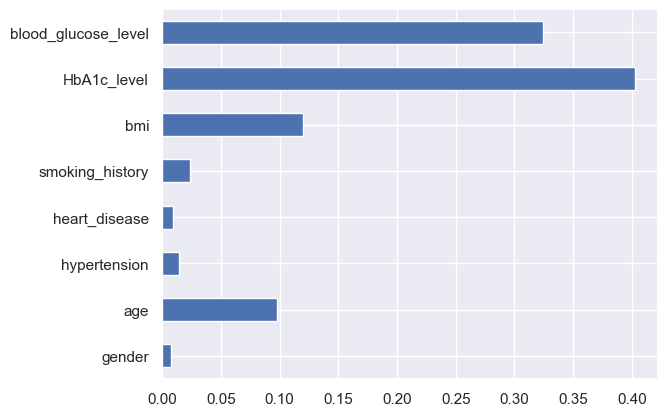

In [46]:
pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh')

#### Saving the supervise learning models

In [124]:
import joblib

In [125]:
# RainForest Classifier Model
joblib.dump(rfc, "rfc_model.pkl")

# Decicion Tree
joblib.dump(dtree, "dtree_model.pkl")

#
joblib.dump(svc_model, "svc_model.pkl")

['svc_model.pkl']

#### Loading the models

In [126]:
# rfc = joblib.load("rfc_model.pkl")
# dtree = joblib.load("dtree_model.pkl")
# svc_model = joblib.load("svc_model.pkl")

In [123]:
rfc.predict([[0, 137, 40, 35, 168, 43.1, 2.228, 33]]) # 4th patient

array([1.])

### Deep Learning Models

In [128]:
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.012451,-0.908272,-0.425039,-0.312388,-0.276132,-0.642655,-1.064616,-0.098674,-1.0
1,0.012451,0.579941,-0.425039,-0.312388,-0.921480,0.164062,-0.284770,-0.063611,-1.0
2,0.012451,0.533434,-0.425039,-0.312388,-0.276132,0.127820,-2.078415,-0.081143,-1.0
3,0.012451,0.626447,2.352723,-0.312388,-0.276132,0.282184,-0.908647,-0.081143,-1.0
4,0.012451,-0.396699,-0.425039,-0.312388,-0.921480,0.092921,0.261121,-0.098674,-1.0
...,...,...,...,...,...,...,...,...,...
199995,0.012451,-0.536219,-0.425039,-0.312388,0.369217,0.648630,2.210735,1.338943,1.0
199996,0.012451,-0.582726,-0.425039,-0.312388,-0.276132,0.839235,1.586859,-0.151270,1.0
199997,0.012451,-1.698885,-0.425039,-0.312388,-0.921480,0.451313,0.339106,2.390858,1.0
199998,0.012451,0.672954,2.352723,-0.312388,1.014565,-0.991651,2.210735,2.390858,1.0


In [130]:
#diabetes_df_copy

#### The CNN Model

In [134]:
%pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.8 MB 6.1 MB/s eta 0:00:01
   ------------------ --------------------- 0.9/1.8 MB 9.0 MB/s eta 0:00:01
   --------------------------- ------------ 1.2/1.8 MB 8.7 MB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 8.6 MB/s eta 0:00:01
   -------------------------------------- - 1.8/1.8 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.4-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB

In [25]:
### Importing the libraries for Model
from keras.layers import Conv1D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, EarlyStopping

In [26]:
#### Creating a copy of theb dataset for training the CNN model
diabetes_cnn = diabetes_df_copy

In [27]:
diabetes_cnn

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
17200,1,31,0,0,1,24.66,4.8,158,0
30695,2,63,0,0,0,30.67,5.8,160,0
19408,2,62,0,0,1,30.40,3.5,159,0
67205,2,64,1,0,1,31.55,5.0,159,0
69158,1,42,0,0,0,30.14,6.5,158,0
...,...,...,...,...,...,...,...,...,...
37158,2,39,0,0,2,34.28,9.0,240,1
3002,1,38,0,0,1,35.70,8.2,155,1
41397,1,14,0,0,0,32.81,6.6,300,1
1218,1,65,1,0,3,22.06,9.0,300,1


In [28]:
test_diabetes = diabetes_cnn.sample(frac=0.2, random_state=42)
diabetes_cnn = diabetes_cnn.drop(test_diabetes.index)
val_diabetes = diabetes_cnn.sample(frac=0.25, random_state=42)
train_diabetes = diabetes_cnn.drop(val_diabetes.index)

target_train = train_diabetes['diabetes']
target_test = test_diabetes['diabetes']
target_val = val_diabetes['diabetes']

target_train.unique(), target_test.unique(),target_val.unique()

(array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64))

In [29]:
# the datasets for training, testing and validation
XX_train = train_diabetes
XX_test = test_diabetes
XX_val = val_diabetes

In [30]:
# the target class for training, testing and validation
yy_train = target_train
yy_test = target_test
yy_val = target_val

In [31]:
# Convert dataset from dataframe to numpy
# to allow reshaping of data later

XX_train = XX_train.to_numpy()
XX_test = XX_test.to_numpy()
XX_val = XX_val.to_numpy()

yy_train = yy_train.to_numpy()
yy_test = yy_test.to_numpy()
yy_val = yy_val.to_numpy()

In [32]:
# One hot encoding for cross entropy loss in CNN model 

yy_train = to_categorical(target_train, num_classes=2)
yy_test = to_categorical(target_test, num_classes=2)
yy_val = to_categorical(target_val, num_classes=2)

In [33]:
print(XX_train.shape)
print(XX_test.shape)
print(XX_val.shape)

print(yy_train.shape)
print(yy_test.shape)
print(yy_val.shape)

(39105, 9)
(40000, 9)
(17935, 9)
(39105, 2)
(40000, 2)
(17935, 2)


In [35]:
# Reshaping the dataset for the CNN model

XX_train = XX_train.reshape(len(XX_train), XX_train.shape[1], 1)
XX_test = XX_test.reshape(len(XX_test), XX_test.shape[1], 1)
XX_val = XX_val.reshape(len(XX_val), XX_val.shape[1], 1)

XX_test.shape, XX_val.shape, XX_train.shape

((40000, 9, 1), (17935, 9, 1), (39105, 9, 1))

In [92]:
XX_train.shape[2]

1

In [94]:
# Defining the CNN model

def model():
    model = Sequential()
    # Defining the input layer
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', padding='same', 
                     input_shape=(XX_train.shape[1], XX_train.shape[2])))
    model.add(BatchNormalization())
    # Adding a pooling layer
    model.add(MaxPooling1D(pool_size=(2), strides=2, padding='same'))
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', padding='same', 
                     input_shape=(XX_train.shape[1], XX_train.shape[2])))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax')) # 2 for positive and negative class of predictions
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [115]:
cnn = model()
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 9, 64)          │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 9, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 5, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,018 (179.76 KB)

 Trainable params: 45,890 (179.26 KB)

 Non-trainable params: 128 (512.00 B)

In [96]:
print(XX_train.shape)
print(yy_train.shape)

(8144, 9, 1)
(8144, 2)


In [100]:
# Training the model and implement early stopping

early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
logger = CSVLogger('logs.csv', append=True)
history = cnn.fit(XX_train, yy_train, epochs=50, batch_size=32, 
                  validation_data=(XX_val, yy_val), callbacks=[logger, early_stopper])

Epoch 1/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 1.8724e-07 - val_accuracy: 0.9997 - val_loss: 0.0080
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 1.9469e-07 - val_accuracy: 0.9997 - val_loss: 0.0081
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 4.3149e-08 - val_accuracy: 0.9997 - val_loss: 0.0082
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 4.9930e-08 - val_accuracy: 0.9997 - val_loss: 0.0084
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 9.3114e-08 - val_accuracy: 0.9997 - val_loss: 0.0085
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 8.3930e-08 - val_accuracy: 0.9997 - val_loss: 0.0086


In [101]:
# Evaluating the model performance of the model
performance = cnn.evaluate(XX_test, yy_test)
print("%s: %.2f%%" % (cnn.metrics_names[1], performance[1] * 100))

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0276
compile_metrics: 99.90%


In [117]:
# Check history of model
cnn_hist = history.history
cnn_hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

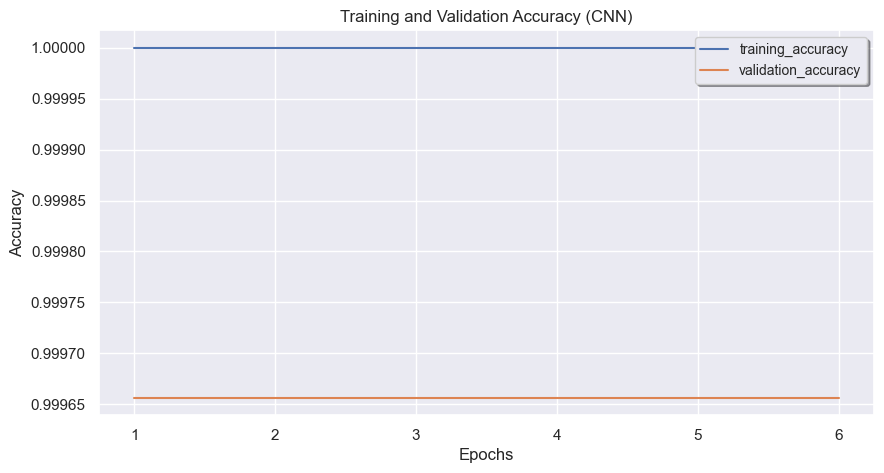

In [119]:
epochs = range(1, len(cnn_hist['loss']) + 1)
accuracy = cnn_hist['accuracy']
loss = cnn_hist['loss']
val_accuracy = cnn_hist['val_accuracy']
val_loss = cnn_hist['val_loss']


# Visualize the training and value accuracy
plt.figure(figsize=(10,5))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.legend(loc='upper right', fontsize='small', shadow=True, fancybox=True)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

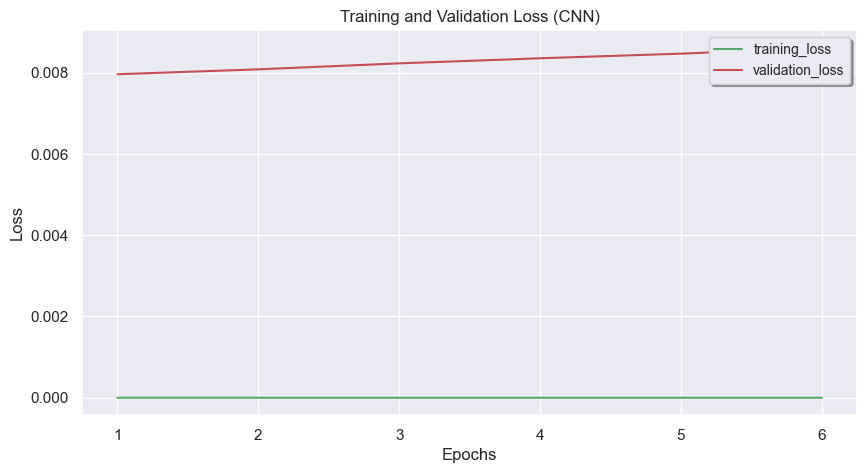

In [111]:
# Visualize train and value loss
plt.figure(figsize=(10,5))
plt.title('Training and Validation Loss (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='training_loss', color='g')
plt.plot(epochs, val_loss, label='validation_loss', color='r')
plt.legend(loc='upper right', fontsize='small', shadow=True, fancybox=True)
plt.legend

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

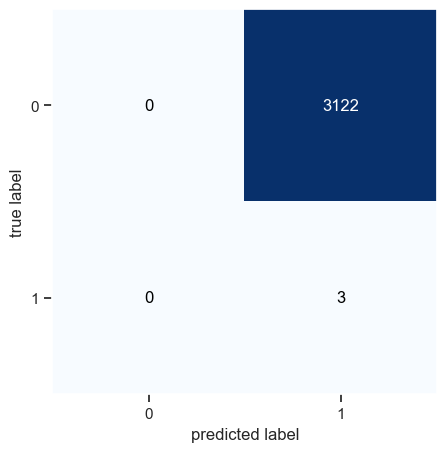

In [120]:
#plotting confusion matrix

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cnn_predict = cnn.predict(XX_test)
cnn_predict = np.argmax(cnn_predict, axis=1)
yy_true = np.argmax(yy_test, axis=1)

c_matrix = confusion_matrix(yy_true, cnn_predict)
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(5,5))
plt.show

In [122]:
# Saving the CNN model (history)
import joblib

joblib.dump(history, 'cnn_model.sav')

['cnn_model.sav']

#### The LSTM Model

In [26]:
# Using tensorflow to build a sequential LSTM model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.metrics import mean_squared_error #accuracy
from sklearn.preprocessing import MinMaxScaler

In [27]:
# The cleaned dataset from the copy of the diabetes dataset
diabetes_lstm = diabetes_df_copy

In [28]:
diabetes_lstm

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
17200,1,31,0,0,1,24.66,4.8,158,0
30695,2,63,0,0,0,30.67,5.8,160,0
19408,2,62,0,0,1,30.40,3.5,159,0
67205,2,64,1,0,1,31.55,5.0,159,0
69158,1,42,0,0,0,30.14,6.5,158,0
...,...,...,...,...,...,...,...,...,...
37158,2,39,0,0,2,34.28,9.0,240,1
3002,1,38,0,0,1,35.70,8.2,155,1
41397,1,14,0,0,0,32.81,6.6,300,1
1218,1,65,1,0,3,22.06,9.0,300,1


In [29]:
# Scaled lstm diabetes dataset using the minmax()

scaler = MinMaxScaler()
diabetes_lstm =  scaler.fit_transform(diabetes_lstm)

In [30]:
diabetes_lstm

array([[1.        , 0.3875    , 0.        , ..., 0.23636364, 0.35454545,
        0.        ],
       [1.        , 0.7875    , 0.        , ..., 0.41818182, 0.36363636,
        0.        ],
       [1.        , 0.775     , 0.        , ..., 0.        , 0.35909091,
        0.        ],
       ...,
       [1.        , 0.175     , 0.        , ..., 0.56363636, 1.        ,
        1.        ],
       [1.        , 0.8125    , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.75      , 0.        , ..., 0.4       , 0.63636364,
        1.        ]])

In [31]:
# Creating a sequence from the dataset
def create_sequence(data, sequence_length):
    sequence = []
    labels = []
    for i in range(len(data)-sequence_length):
        sequence.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequence), np.array(labels)

In [32]:
# creating an input data of 100 in each cycle; for 100 dataset per group (a snapshot of the data per time)

X_X, y_y = create_sequence(diabetes_lstm, 100)

In [33]:
X_X.shape

(199900, 100, 9)

In [34]:
y_y.shape

(199900, 9)

In [35]:

X_Xtrain, X_Xtmp, y_ytrain, y_ytmp = train_test_split(X_X,y_y,test_size=0.4, random_state = 42) #60% of the dataset for training

In [36]:
 X_Xval, X_Xtest, y_yval, y_ytest = train_test_split(X_Xtmp,y_ytmp,test_size=0.5, random_state = 42) # 20% for testing and 20% for validation

In [46]:
# Defining the lstm model
def create_lstm_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=64, activation='relu', input_shape=(X_Xtrain.shape[1], X_Xtrain.shape[2]), return_sequences=True))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
    model.add(tf.keras.layers.LSTM(units=64, return_sequences=False))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(9))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [41]:
from keras.callbacks import EarlyStopping, CSVLogger

early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lstm_logger = CSVLogger('lstm_logs.csv', append=True)

In [47]:
# Training the model
lstm = create_lstm_model()

history_lstm = lstm.fit(X_Xtrain, y_ytrain, epochs=50,
                         batch_size=32, validation_data=(X_Xval, y_yval), shuffle=False,
                         callbacks=[lstm_logger, early_stopper])

Epoch 1/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 353s 94ms/step - accuracy: 0.1093 - loss: 13.1606 - val_accuracy: 0.9999 - val_loss: 7.5618
Epoch 2/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 423s 113ms/step - accuracy: 0.9408 - loss: 7.5951 - val_accuracy: 0.9999 - val_loss: 7.5276
Epoch 3/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 452s 121ms/step - accuracy: 0.9943 - loss: 7.5090 - val_accuracy: 0.9999 - val_loss: 7.5259
Epoch 4/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 428s 114ms/step - accuracy: 0.9998 - loss: 7.4938 - val_accuracy: 0.9999 - val_loss: 7.5259
Epoch 5/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 451s 120ms/step - accuracy: 0.9998 - loss: 7.4914 - val_accuracy: 0.9999 - val_loss: 7.5260
Epoch 6/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 437s 116ms/step - accuracy: 0.9844 - loss: nan - val_accuracy: 0.9999 - val_loss: nan
Epoch 7/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 432s 115ms/step - accuracy: 0.9998 - loss: nan - val_accuracy: 0.9999 - val_loss: nan
Epoch 8/50
3749/3749 ━━━━━━━━━━━━━━━━━━━━ 458s 122ms/step - accuracy: 0.99

In [49]:
# Evaluating the model performance of the model
lstm_perform = lstm.evaluate(X_Xtest, y_ytest)
print("%s: %.2f%%" % (lstm.metrics_names[1], lstm_perform[1] * 100))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.9999 - loss: 7.5193
compile_metrics: 99.98%


In [50]:
# Saving the CNN model (history)
import joblib

joblib.dump(history_lstm, 'lstm_model.sav')

['lstm_model.sav']

In [51]:
# Check history of model
lstm_hist = history_lstm.history
lstm_hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

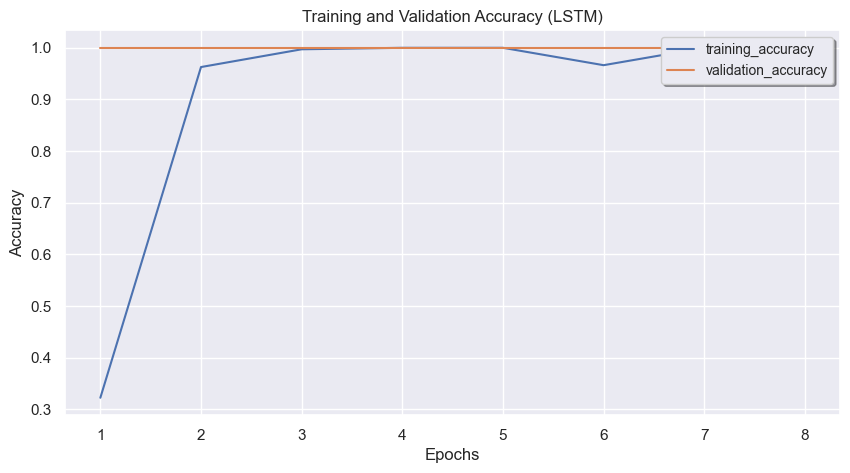

In [53]:
epochs = range(1, len(lstm_hist['loss']) + 1)
lstm_accuracy = lstm_hist['accuracy']
lstm_loss = lstm_hist['loss']
lstm_val_accuracy = lstm_hist['val_accuracy']
lstm_val_loss = lstm_hist['val_loss']


# Visualize the training and value accuracy
plt.figure(figsize=(10,5))
plt.title('Training and Validation Accuracy (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, lstm_accuracy, label='training_accuracy')
plt.plot(epochs, lstm_val_accuracy, label='validation_accuracy')
plt.legend(loc='upper right', fontsize='small', shadow=True, fancybox=True)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

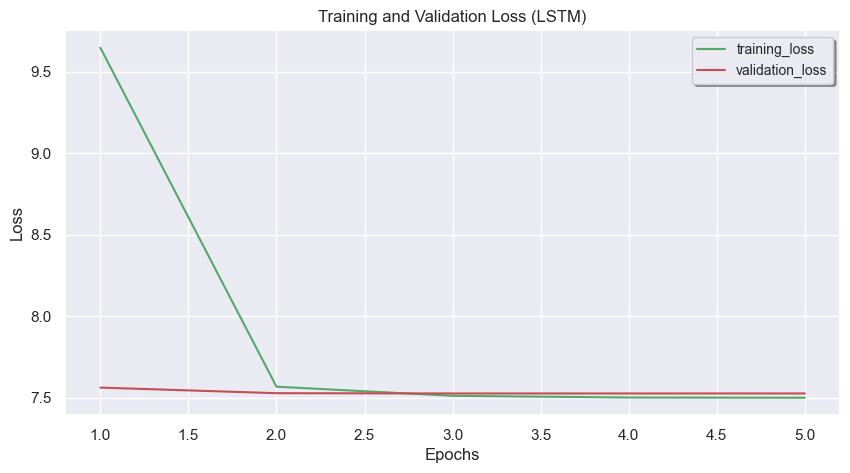

In [54]:
# Visualize train and value loss
plt.figure(figsize=(10,5))
plt.title('Training and Validation Loss (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, lstm_loss, label='training_loss', color='g')
plt.plot(epochs, lstm_val_loss, label='validation_loss', color='r')
plt.legend(loc='upper right', fontsize='small', shadow=True, fancybox=True)
plt.legend

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

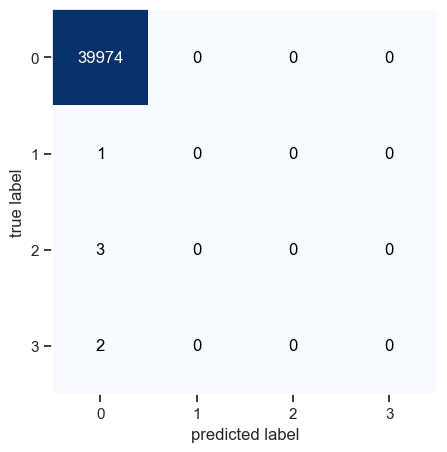

In [56]:
#plotting confusion matrix

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

lstm_predict = lstm.predict(X_Xtest)
lstm_predict = np.argmax(lstm_predict, axis=1)
yy_true = np.argmax(y_ytest, axis=1)

c_matrix = confusion_matrix(yy_true, lstm_predict)
fig, ax = plot_confusion_matrix(conf_mat=c_matrix, figsize=(5,5))
plt.show

### Visualising the results